In [2]:
import sys,os
add_path = os.path.abspath('../python')
if not add_path in sys.path:
    sys.path.append(add_path)
print(sys.path.index(add_path))
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
import segbench
from segbench import interp3, edgeNms3d, correspondVoxels

In [6]:
A = np.array(range(0,27)).reshape(3,3,3)

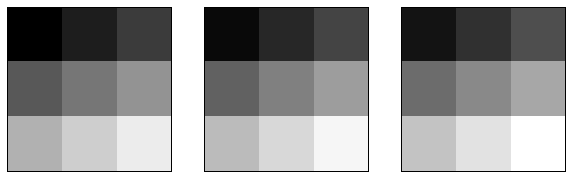

In [7]:

vmin,vmax = A.min(),A.max()
fig = plt.figure(figsize = (10,10))
for i in range(0,A.shape[2]):
    ax = plt.subplot(1,3,i+1)
    ax.imshow(A[:,:,i],vmin=vmin,vmax=vmax)
    ax.set_xticklabels([]);ax.set_yticklabels([])
    ax.yaxis.set_ticks_position('none');ax.xaxis.set_ticks_position('none')

In [8]:
K = 3*2-1
x,y,z = np.linspace(0,2,K),np.linspace(0,2,K),np.linspace(0,2,K)
X,Y,Z = np.meshgrid(x,y,z)
B = np.zeros((K,K,K))
for xi,yi,zi in zip(X.ravel(),Y.ravel(),Z.ravel()):
    B[int(xi*2),int(yi*2),int(zi*2)] = interp3(A,xi,yi,zi)
print B.shape

(5, 5, 5)


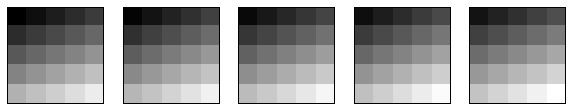

In [9]:
vmin,vmax = B.min(),B.max()
fig = plt.figure(figsize = (10,10))
for i in range(0,B.shape[2]):
    ax = plt.subplot(1,B.shape[2],i+1)
    ax.imshow(B[:,:,i],vmin=vmin,vmax=vmax)
    ax.set_xticklabels([]);ax.set_yticklabels([])
    ax.yaxis.set_ticks_position('none');ax.xaxis.set_ticks_position('none')

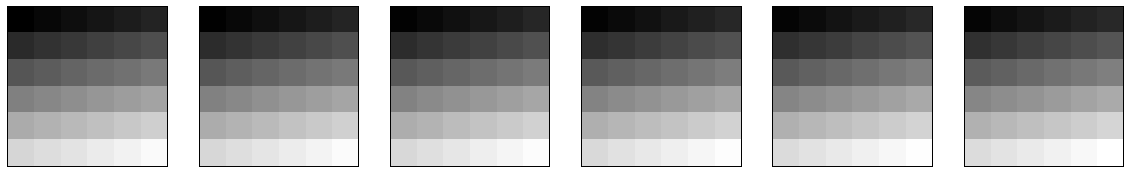

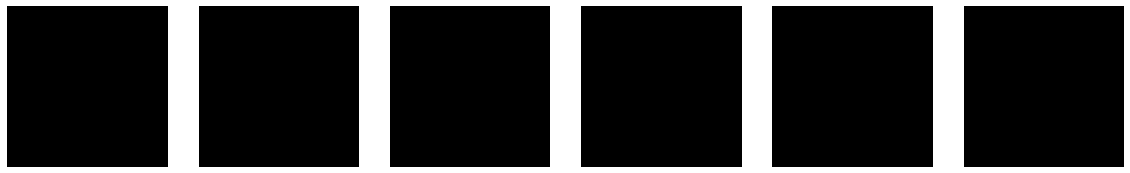

In [10]:
M = 6
A = np.array(range(0,M**3)).reshape(M,M,M)

N = 1
K = M*N
x,y,z = np.linspace(0,M-1,K),np.linspace(0,M-1,K),np.linspace(0,M-1,K)
X,Y,Z = np.meshgrid(x,y,z)
B = np.zeros((K,K,K))
vmin,vmax = B.min(),B.max()
for xi,yi,zi in zip(X.ravel(),Y.ravel(),Z.ravel()):
    B[int(xi*N),int(yi*N),int(zi*N)] = interp3(A,xi,yi,zi)
vmin,vmax = B.min(),B.max()
fig = plt.figure(figsize = (20,20))
for i in range(0,B.shape[2]):
    ax = plt.subplot(1,B.shape[2],i+1)
    ax.imshow(B[:,:,i],vmin=vmin,vmax=vmax)
    ax.set_xticklabels([]);ax.set_yticklabels([])
    ax.yaxis.set_ticks_position('none');ax.xaxis.set_ticks_position('none')
fig = plt.figure(figsize = (20,20))
C = A-B
for i in range(0,C.shape[2]):
    ax = plt.subplot(1,C.shape[2],i+1)
    ax.imshow(C[:,:,i],vmin=vmin,vmax=vmax)
    ax.set_xticklabels([]);ax.set_yticklabels([])
    ax.yaxis.set_ticks_position('none');ax.xaxis.set_ticks_position('none')

In [1]:
import sys,os
add_path = os.path.abspath('../python')
if not add_path in sys.path:
    sys.path.append(add_path)
print(sys.path.index(add_path))
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['image.interpolation'] = 'hanning'
plt.rcParams['image.cmap'] = 'gray'
import segbench
from segbench import interp3, edgeNms3d, correspondVoxels, correspondPixels
import skimage
from skimage.filters import gaussian_filter
import SimpleITK as sitk
def normalimg(E):
    if (E.max()-E.min())>0:
        return (E-E.min())/(E.max()-E.min())
    else:
        return E
def edgeOrientation(E,s=1):
    D = normalimg(gaussian_filter(E,s))
    Ox,Oy,Oz = np.gradient(D)
    M = np.sqrt(Ox*Ox+Oy*Oy+Oz*Oz)
    Ox,Oy,Oz = (Ox,Oy,Oz)/M
    theta = np.arctan(Oy/(Oz+1e-5))
    phi = np.arctan(Oz/(M+1e-5))
    Px= np.sin(theta)*np.cos(phi)
    Py= np.sin(theta)*np.sin(phi)
    Pz= np.cos(phi)
    return Px,Py,Pz,D
    
def plot_vol(V,num_frames=4):
    vmin,vmax = V.min(),V.max()
    ds = V.shape
    frame_list = map(int,np.arange(0,ds[2],np.floor(ds[2]/num_frames)))
    for i,f in enumerate(frame_list):
        ax = plt.subplot(1,ds[2],i+1)
        ax.imshow(V[:,:,f],vmin=vmin,vmax=vmax)
        ax.set_xticklabels([]);ax.set_yticklabels([])
        ax.yaxis.set_ticks_position('none');ax.xaxis.set_ticks_position('none')
        
def plot_vol_ov(V,num_frames=4):
    ds = V.shape
    frame_list = map(int,np.arange(0,ds[2],np.floor(ds[2]/num_frames)))
    Is = [np.dstack((V[:,:,i,0],V[:,:,i,1],np.zeros_like(V[:,:,i,0]))) for i in frame_list]
    for i,I in enumerate(Is):
        ax = plt.subplot(1,ds[2],i+1)
        ax.imshow(I)
        ax.set_xticklabels([]);ax.set_yticklabels([])
        ax.yaxis.set_ticks_position('none');ax.xaxis.set_ticks_position('none')
def thin(img):
    return sitk.GetArrayFromImage(sitk.BinaryThinning(sitk.GetImageFromArray(img.astype(int))))
def dilate(img):
    return sitk.GetArrayFromImage(sitk.BinaryDilate(sitk.GetImageFromArray(img.astype(int))))

15


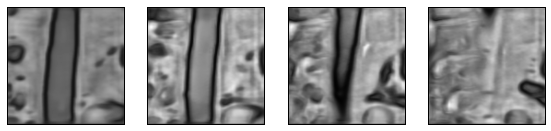

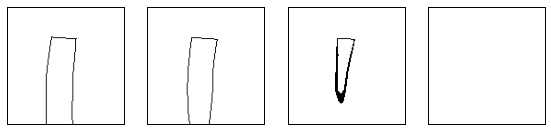

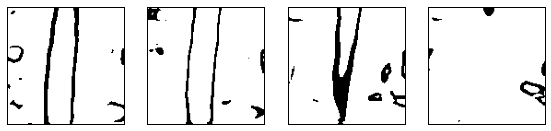

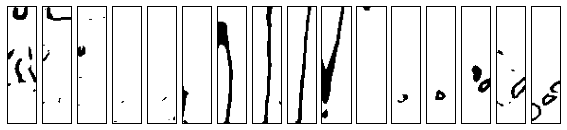

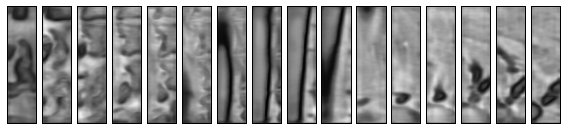

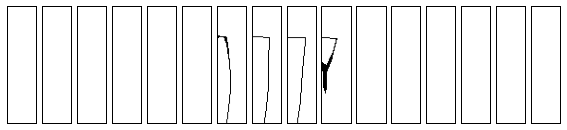

ov


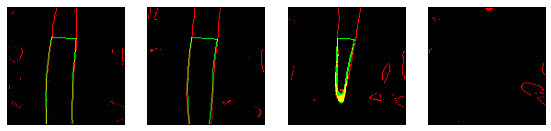

In [44]:
plt.rcParams['image.interpolation'] = 'hanning'
E = np.load("3dEdgeE.npy")
GT = np.load("3dEdgeGT.npy")
E = normalimg(E)
# E = gaussian_filter(E,1)
vmin,vmax = E.min(),E.max()
dX, dY, dZ, D = edgeOrientation(E,s=15)
Enms = edgeNms3d(E, dY,dX, dZ, r=.1, s=0, m=1.01)
Enms = normalimg(Enms)
ds = E.shape
num_frames = 4
fig = plt.figure(figsize = (80,80))
plot_vol(1-E,num_frames)
fig = plt.figure(figsize = (80,80))
plot_vol(1-GT,num_frames)
fig = plt.figure(figsize = (80,80))
Et = ((Enms>.8))
plot_vol(1-Et,num_frames)
fig = plt.figure(figsize = (80,80))
plot_vol(1-Et.swapaxes(2,1),num_frames*4)

fig = plt.figure(figsize = (80,80))
plot_vol(1-E.swapaxes(2,1),num_frames*4)

fig = plt.figure(figsize = (80,80))
plot_vol(1-GT.swapaxes(2,1),num_frames*4)

plt.show()
print("ov")
fig = plt.figure(figsize = (80,80))
OV = np.concatenate((Enmsthin[...,np.newaxis],
                        normalimg(GT)[...,np.newaxis]),
                       axis=3)
plot_vol_ov(OV,num_frames)

In [45]:
match1 = list()
match2 = list()
for i in range(Enms.shape[-1]):
    cost,oc,m1,m2 = correspondPixels(Enmsthin[:,:,i].astype(float),GT[:,:,i].astype(float),.0075)
    match1.append(m1);match2.append(m2)
match1 = np.dstack(match1)
match2 = np.dstack(match2)

cost,oc,match1vol,match2vol = \
correspondVoxels(Et.astype(float),(GT).astype(float),.05,6)

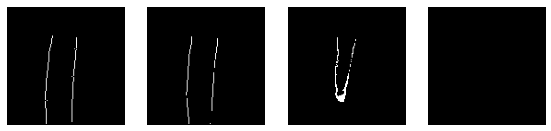

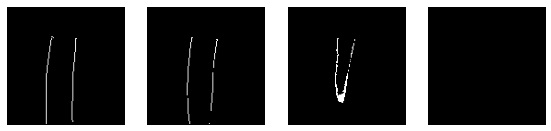

vol


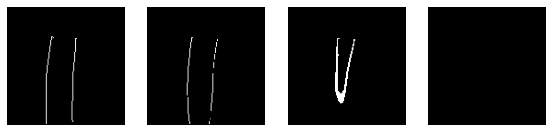

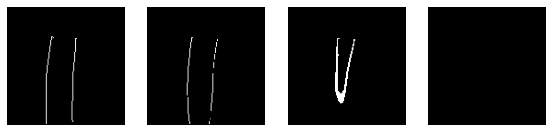

In [46]:
num_frames = 4
fig = plt.figure(figsize = (80,80))
plot_vol(match1>0,num_frames)
fig = plt.figure(figsize = (80,80))
plot_vol(match2>0,num_frames)
plt.show()
print("vol")
fig = plt.figure(figsize = (80,80))
plot_vol(match2vol>0,num_frames)
fig = plt.figure(figsize = (80,80))
plot_vol(match2vol>0,num_frames)

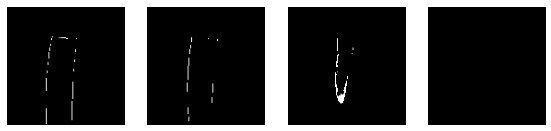

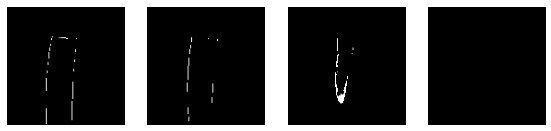

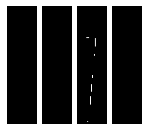

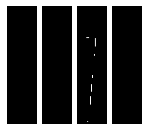

In [28]:
plt.rcParams['image.interpolation'] = 'hanning'
cost,oc,match1vol,match2vol = \
correspondVoxels((Enms>.1).astype(float),(GT).astype(float),.00001,10)


fig = plt.figure(figsize = (80,80))
plot_vol(match1vol>0,num_frames)
fig = plt.figure(figsize = (80,80))
plot_vol(match2vol>0,num_frames)

fig = plt.figure(figsize = (80,80))
plot_vol((match1vol>0).swapaxes(2,1),num_frames)

fig = plt.figure(figsize = (80,80))
plot_vol((match1vol>0).swapaxes(2,1),num_frames)

(128, 128, 32)


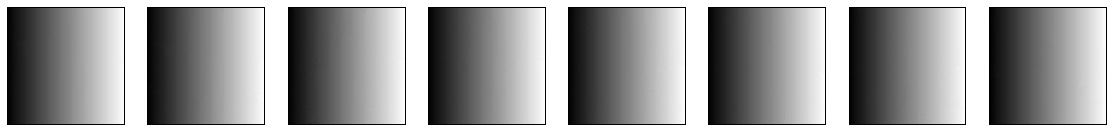

In [20]:
E = np.load("3dEdgeTest.npy")
E = normalimg(1-E)
from scipy.interpolate import interp1d
def interp3D(V, x, y, z, xi, yi, zi):
    B = np.zeros((max(x)+1,max(y)+1,max(z)+1))
    for xx,yy,zz,xxi,yyi,zzi in zip(x,y,z,xi,yi,zi):
        B[xx,yy,zz] = interp3(V,xxi,yyi,zzi)
    return B
    

print E.shape
x,y,z = range(0,E.shape[0]),range(0,E.shape[1]),range(0,E.shape[2])
X,Y,Z = np.meshgrid(x,y,z)
dX, dY, dZ, D = edgeOrientation(E,s=5)
# print x
# R = .95*np.concatenate((dX[...,np.newaxis],
#                         dY[...,np.newaxis],
#                         dZ[...,np.newaxis]),
#                        axis=3)
D1X,D1Y,D1Z = X+.95*dX,Y+.95*dY,Z+.95*dZ
# D2X,D2Y,D2Z = X-R,Y-R,Z-R
fig = plt.figure(figsize = (80,80))
plot_vol(D1X,8)

In [21]:
F1 = interp3D(E, X.ravel(), Y.ravel(), Z.ravel(),
              D1X.ravel(), D1Y.ravel(), D1Z.ravel())
# F1 = interp3(x, X, z, v, D1X, D1Y, D1Z)

In [22]:
fig = plt.figure(figsize = (80,80))
plot_vol(F1,8)

AttributeError: 'NoneType' object has no attribute 'min'

In [ ]:
B = np.zeros((K,K,K))
vmin,vmax = B.min(),B.max()
for xi,yi,zi in zip(X.ravel(),Y.ravel(),Z.ravel()):
    B[int(xi*N),int(yi*N),int(zi*N)] = interp3(A,xi,yi,zi)